## Procedure

1. Import and clean data
2. **Exploratory Data Analysis (EDA)**
3. Modeling & evaluation
4. Conclusion
5. Clean code with classes & functions

In [ ]:
blah

In [18]:
import pandas as pd
import numpy as np
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
features = joblib.load('../work/data/features')
features_transformed = joblib.load('../work/data/features_transformed')
target = joblib.load('../work/data/target')

## PCA
Use the first two principal components to visualize the data

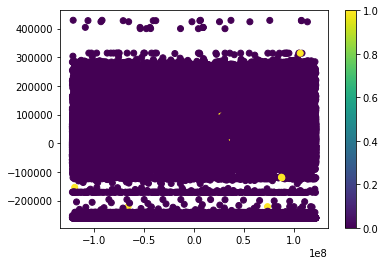

In [5]:
# Try PCA on non-transformed data

pca = PCA()
features_pca = pca.fit_transform(features)
plt.scatter(features_pca[:,0], features_pca[:,1], c=target)
plt.colorbar()

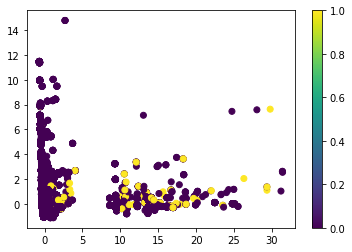

In [7]:
# Try PCA on transformed data

pca = PCA()
features_pca = pca.fit_transform(features_transformed)
plt.scatter(features_pca[:,0], features_pca[:,1], c=target)
plt.colorbar()

In [14]:
pca.explained_variance_ratio_[:5]

array([ 0.13258631,  0.10384451,  0.07315312,  0.07306768,  0.07299079])

In [15]:
# 11 components can account for 90% of the variance

np.where(np.cumsum(pca.explained_variance_ratio_) > .9)[0][0]

11

In [12]:
len(pca.explained_variance_ratio_)

16

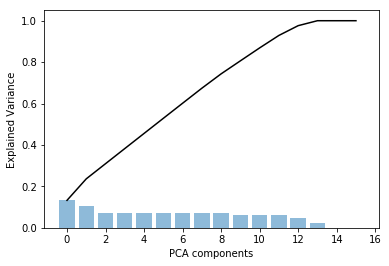

In [13]:
# create an x-axis variable for each pca component
x = np.arange(16)

# plot the cumulative variance
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), color='black')

# plot the components' variance
plt.bar(x, pca.explained_variance_ratio_, align='center', alpha=0.5)

# plot styling
plt.xlabel('PCA components')
plt.ylabel('Explained Variance')
plt.show()

## KMeans
Use KMeans to cluster the data. Evaluate different values of K visually and with the silhouette score.

MemoryError: 

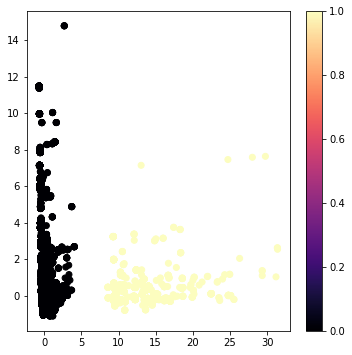

In [21]:
fig = plt.figure(figsize=(20,20))

for i, k in enumerate (range(2,10)):
    fig.add_subplot(3,3,i+1)
    km = KMeans(n_clusters=k, random_state=88)
    km.fit(features_transformed)
    km.transform(features_transformed)
    plt.scatter(features_pca[:,0], features_pca[:,1], c=km.labels_, cmap='magma')
    plt.colorbar()
    plt.title('K:{} \nSilhouette Score: {}'.format(k,silhouette_score(features_transformed, km.labels_ )))

In [36]:
joblib.dump(features, '../work/data/features_transformed')
joblib.dump(target, '../work/data/target')

['../work/data/target']